# XBeach Post Process

In [1]:
import sys;sys.path.append('../xbeach/')
from importlib import reload
from libs import *
from PIL import Image
from mpl_toolkits.basemap import Basemap
import glob
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
root = pl.Path(r'Z:\Users\Tyler\projects\TNC\modeling\2d')
xb = nc4.Dataset(str(root / 'march28' / 'xboutput.nc'))
x = xb.variables['globalx'][:,:]
y = xb.variables['globaly'][:,:]
z = xb.variables['zb_mean'][:,:,:]
t = xb.variables['meantime'][:]
h = xb.variables['H_mean'][:,:,:]
zs = xb.variables['zs_mean'][:,:,:]

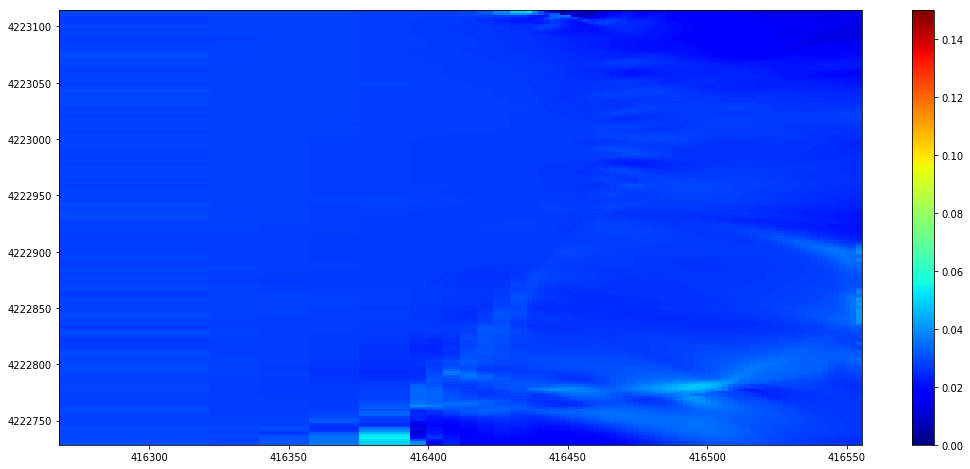

In [11]:
levels = [0,0.15]
fig,ax = plt.subplots(figsize=(18,8))

cmap = mpl.cm.get_cmap('jet')  
normalize = mpl.colors.Normalize(vmin=min(levels), vmax=max(levels))
colors = [cmap(normalize(value)) for value in levels]
cax, _ = mpl.colorbar.make_axes(ax)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
topo = ax.pcolor(x,y,h[20,:,:],cmap='jet',vmin=min(levels), vmax=max(levels))

In [ ]:
wl=[]
levels = [0,0.15]
for i in range(0,144):
    file_number = '%05d'%i
    fig,ax = plt.subplots(figsize=(18,8))
    wl.append('WL{}.png'.format(file_number))
    topo = ax.pcolor(x,y,h[i,:,:],cmap='jet',vmin=min(levels), vmax=max(levels))
    cmap = mpl.cm.get_cmap('jet')
    normalize = mpl.colors.Normalize(vmin=min(levels), vmax=max(levels))
    colors = [cmap(normalize(value)) for value in levels]
    cax, _ = mpl.colorbar.make_axes(ax)
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    plt.savefig('WL{}.png'.format(file_number),dpi=300,bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()
    
images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save('xbeach.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('WL*'):
    os.remove(f)    

<div align="middle"><img style="float:center;" src="xbeach.gif" width=900px></div>

In [ ]:
wl=[]
levels = [-1.75,2]
for i in range(0,144):
    file_number = '%05d'%i
    fig,ax = plt.subplots(figsize=(18,8))
    wl.append('WL{}.png'.format(file_number))
    topo = ax.pcolor(x,y,z[i,:,:],cmap='jet',vmin=min(levels), vmax=max(levels))
    cmap = mpl.cm.get_cmap('jet')
    normalize = mpl.colors.Normalize(vmin=min(levels), vmax=max(levels))
    colors = [cmap(normalize(value)) for value in levels]
    cax, _ = mpl.colorbar.make_axes(ax)
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    plt.savefig('WL{}.png'.format(file_number),dpi=300,bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()
    
images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save('xbeach_xs.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('file*'):
    os.remove(f)  

<div align="middle"><img style="float:center;" src="xbeach_topo.gif" width=900px></div>

In [ ]:
nfile = []


In [3]:
wl=[]
title = 'deal island'
levels = [0,0.75]
for i in range(0,144):
    file_number = '%05d'%i
    fig = plt.figure(figsize=[20,12])
    ax = fig.gca(projection='3d')
    water = ax.plot_surface(x,y,xb.variables['zs_mean'][i,:,:],color='#3333ff',alpha=.75)
    waves = ax.plot_surface(x,y,xb.variables['zs_mean'][i,:,:]+xb.variables['H_mean'][i,:,:],cmap='jet',
                            vmin=min(levels)+np.min(xb.variables['zs_mean'][:,:,:]), vmax=max(levels)+np.max(xb.variables['zs_mean'][:,:,:]))
    original = ax.plot_surface(x,y,xb.variables['zb_mean'][i,:,:],cmap='gist_earth',vmin=-1.,vmax=2)
    cmap = mpl.cm.get_cmap('jet')
    normalize = mpl.colors.Normalize(vmin=min(levels), vmax=max(levels))
    colors = [cmap(normalize(value)) for value in levels]
    cax, _ = mpl.colorbar.make_axes(ax)
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    wl.append('WL{}.png'.format(file_number))
    ax.set_title(title)
    ax.set_zlim(-1.5, 2)
    ax.set_xlim(416200,416600)
    ax.set_ylim(4222700,4223040)
    ax.view_init(30,azim=225)
    ax.autoscale_view(tight=True)

    cbar.set_label('Elevation (m) at NAVD88',fontsize=10)
    plt.savefig('WL{}.png'.format(file_number),dpi=300,bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()
images = []
for ii in range(0,len(timestep)):
    frames = Image.open(timestep[ii])
    images.append(frames)
images[0].save('xbeach3d.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('file*'):
    os.remove(f)    

<div align="middle"><img style="float:center;" src="xbeach3d.gif" width=900px></div>

In [ ]:
    plt.savefig('WL{}.png'.format(file_number),dpi=300,bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()
images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save('xbeach.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('WL*'):
    os.remove(f)  